# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

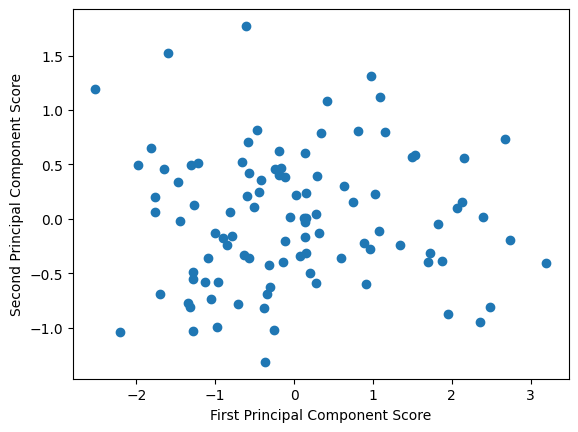

In [7]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

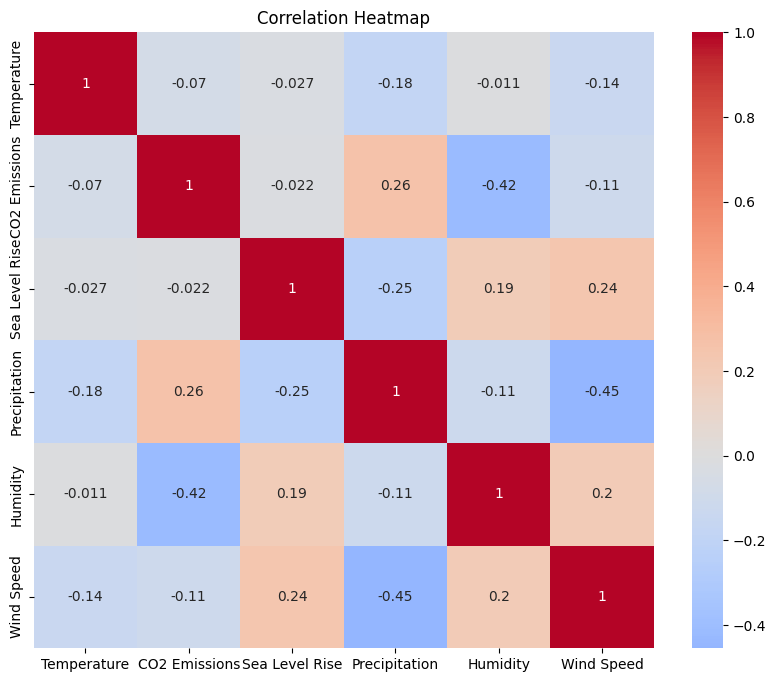

Skipping bubble plot – required columns missing.


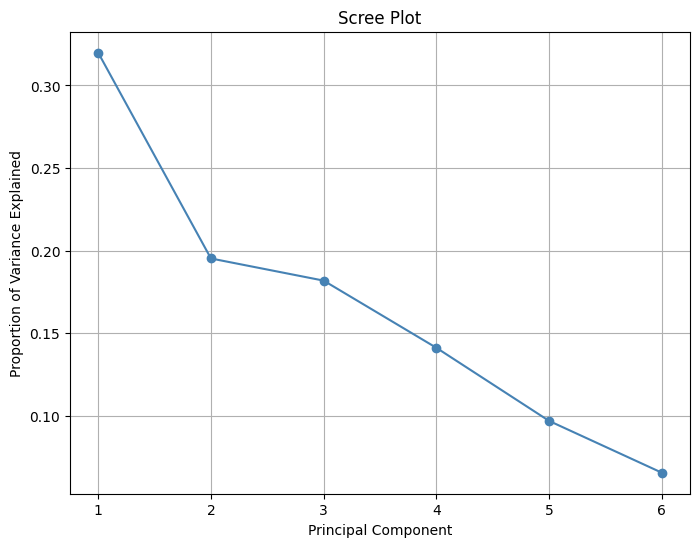


First principal component captures 32.0% of variance

Regression Results with Different Feature Sets:
No valid regression results. Ensure 'Feature1', 'Feature2', 'Feature3', and 'Target' exist in the dataset.

Found 0 potential outliers:
Empty DataFrame
Columns: [Date, Location, Country, Temperature, CO2 Emissions, Sea Level Rise, Precipitation, Humidity, Wind Speed]
Index: []

Conclusions:
- The heatmap shows the correlations between numeric features.
- PCA suggests dimensionality reduction is possible, with the first PC capturing 32.0% of the variance.
- The best performing feature set for regression was: N/A


In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Set random seed for reproducibility
np.random.seed(5)

# 1. Load the dataset
df = pd.read_csv("climate-insights.csv")

# 2. Data Visualization

# Heatmap of correlations
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Bubble plot – check required columns
if all(col in df.columns for col in ['Feature1', 'Feature2', 'Feature3', 'Target']):
    plt.figure(figsize=(10, 8))
    plt.scatter(df['Feature1'], df['Feature2'], 
                s=df['Feature3'] / 5,        # Bubble size
                c=df['Target'],              # Bubble color
                alpha=0.6, cmap='viridis')
    plt.colorbar(label='Target Value')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title('Bubble Plot (Size=Feature3, Color=Target)')
    plt.show()
else:
    print("Skipping bubble plot – required columns missing.")

# 3. Principal Component Analysis (PCA)
features_for_pca = numeric_df.drop(columns=['Target'], errors='ignore')  # Ignore if 'Target' is not in numeric_df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_pca)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Scree plot – explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, pca.n_components_ + 1), 
         pca.explained_variance_ratio_, 'o-', color='steelblue')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# First PC variance
first_pc_variance = pca.explained_variance_ratio_[0]
print(f"\nFirst principal component captures {first_pc_variance:.1%} of variance")

# 4. Linear Regression Analysis

# Try different feature combinations
feature_sets = [
    ['Feature1'],
    ['Feature2'],
    ['Feature3'],
    ['Feature1', 'Feature2'],
    ['Feature1', 'Feature3'],
    ['Feature2', 'Feature3'],
    ['Feature1', 'Feature2', 'Feature3']
]

results = []
for features in feature_sets:
    if all(f in df.columns for f in features + ['Target']):
        X = df[features]
        y = df['Target']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=5)

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        results.append({
            'features': ', '.join(features),
            'r2_score': r2,
            'coefficients': model.coef_
        })

# Display regression results
results_df = pd.DataFrame(results)

print("\nRegression Results with Different Feature Sets:")
if not results_df.empty:
    print(results_df.sort_values('r2_score', ascending=False).to_string(index=False))
else:
    print("No valid regression results. Ensure 'Feature1', 'Feature2', 'Feature3', and 'Target' exist in the dataset.")


# 5. Outlier Detection using Z-score
z_scores = np.abs((numeric_df - numeric_df.mean()) / numeric_df.std())
outliers = df[(z_scores > 3).any(axis=1)]
print(f"\nFound {len(outliers)} potential outliers:")
print(outliers)

# 6. Conclusions
print("\nConclusions:")
print("- The heatmap shows the correlations between numeric features.")
print(f"- PCA suggests dimensionality reduction is possible, with the first PC capturing {first_pc_variance:.1%} of the variance.")
best_model = results_df.loc[results_df['r2_score'].idxmax(), 'features'] if not results_df.empty else "N/A"
print(f"- The best performing feature set for regression was: {best_model}")


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

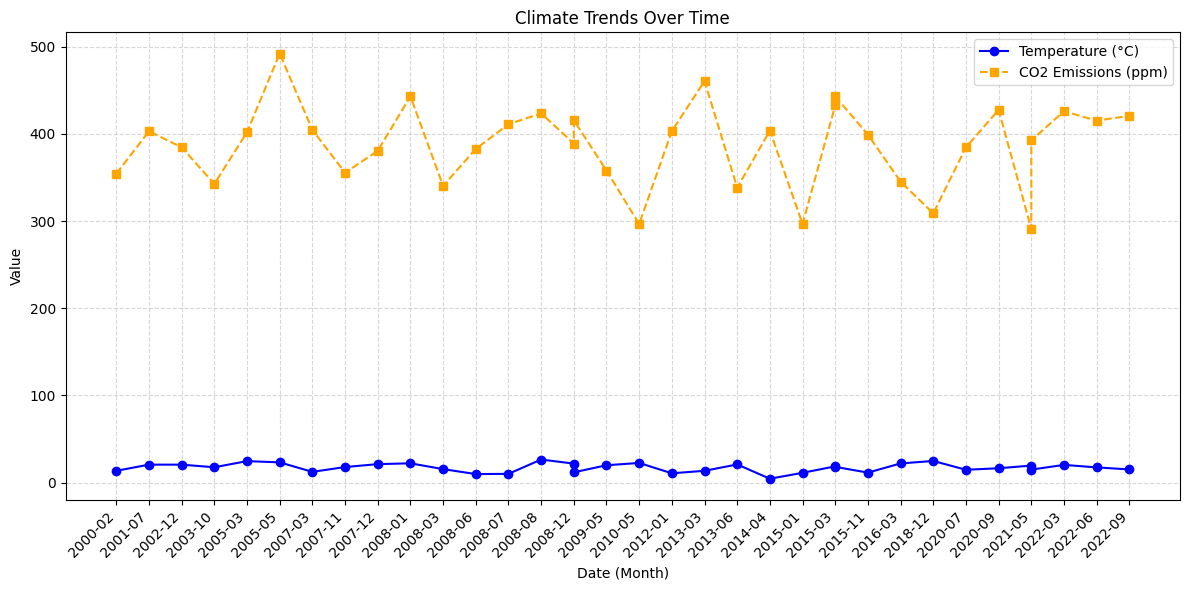

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("climate-insights.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

# Extract monthly labels (optional: only year for x-axis clarity)
df['Year'] = df['Date'].dt.to_period('M').astype(str)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot Temperature (solid blue line with circles)
plt.plot(df['Year'], df['Temperature'], 'o-', label='Temperature (°C)', color='blue')

# Plot CO2 Emissions (dashed orange line with squares)
plt.plot(df['Year'], df['CO2 Emissions'], 's--', label='CO2 Emissions (ppm)', color='orange')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Set title and labels
plt.title('Climate Trends Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()
